In [1]:
import pandas as pd
import numpy as np

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import RUSBoostClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_validate, train_test_split

from sklearn.metrics import precision_recall_fscore_support, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFE

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 5000)

In [2]:
df = pd.read_csv('data/gcj2015.csv')
# dic = {
#     "5639104758808576":"A",
#     "5686275109552128":"B",
#     "5670465267826688":"C",
#     "5658571765186560":"D",
    
#     "5708208098246656":"A",
#     "5750872826970112":"B",
#     "5759940174020608":"C",
#     "5677015495606272":"D",
    
#     "5709131113562112":"A",
#     "6346912416399360":"B",
#     "5765010517131264":"C",
#     "5743952695132160":"D",
#     "5643297854849024":"E"
# }
# df['problem_num_hash'].map(dic) 

###  vars

In [3]:
RS = 42

finalists = df[df['finalist']==True].username.unique()
semi_finalists = df[df['semi_finalist']==True].username.unique()
only_semi_finalists = np.setdiff1d(semi_finalists, finalists)

not_to_normalize = ['round', 'username', 'flines', 'round_name', 'problem_num_hash', 'finalist', 'semi_finalist','file_length_in_char'] ## these two not normalizable

# rounds = ['qualification_round', 'round_1A', 'round_1B', 'round_1C', 'round_2', 'round_3', 'final_round']
rounds = ['qualification_round', 'round_2', 'round_3']

cols_to_drop = ['round', 'round_name', 'problem_num_hash', 'finalist', 'semi_finalist', 'flines', 'file_length_in_char']
cols_to_norm = [e for e in list(df.columns) if e not in not_to_normalize]

### t-SNE

qualification_round 5686275109552128


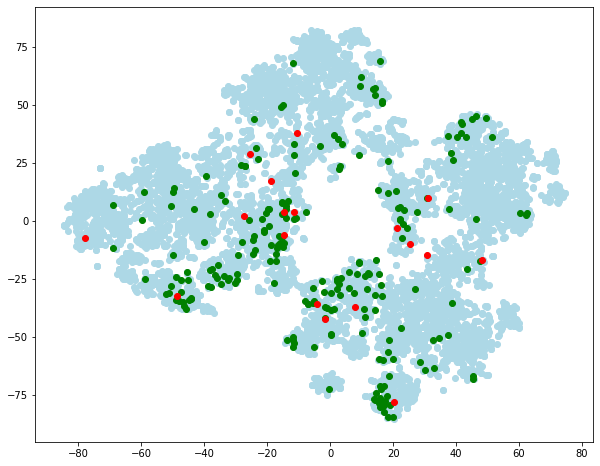

qualification_round 5639104758808576


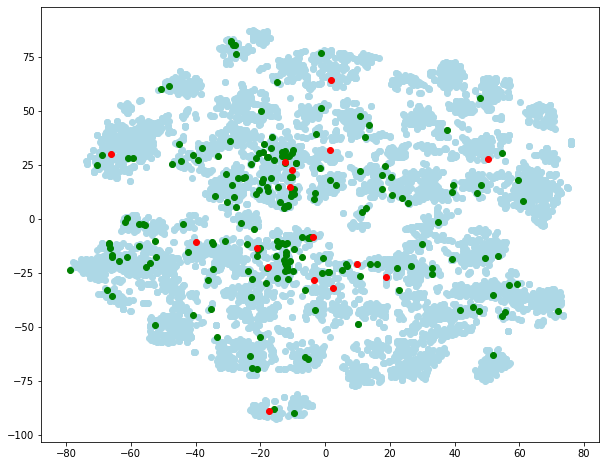

qualification_round 5670465267826688


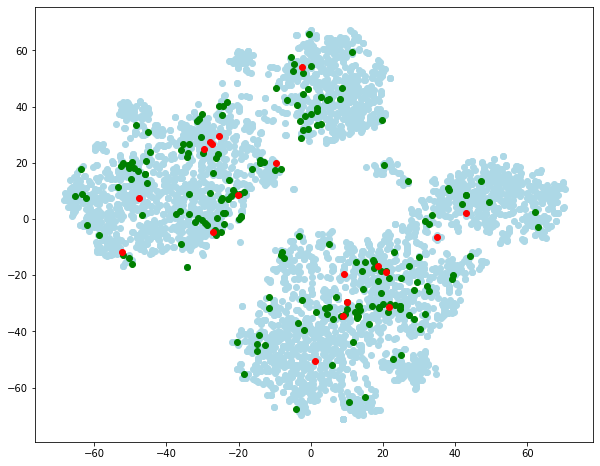

qualification_round 5658571765186560


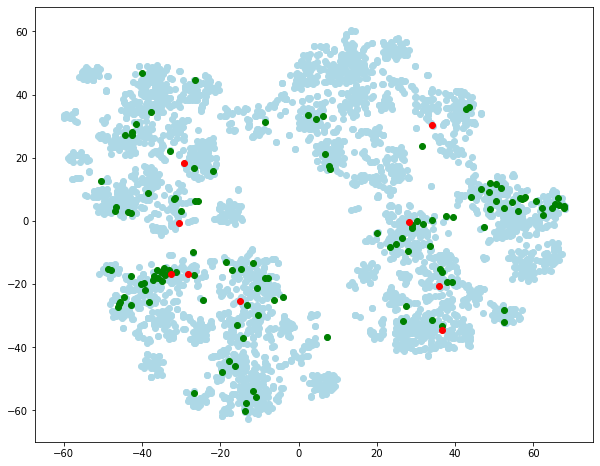

round_2 5750872826970112


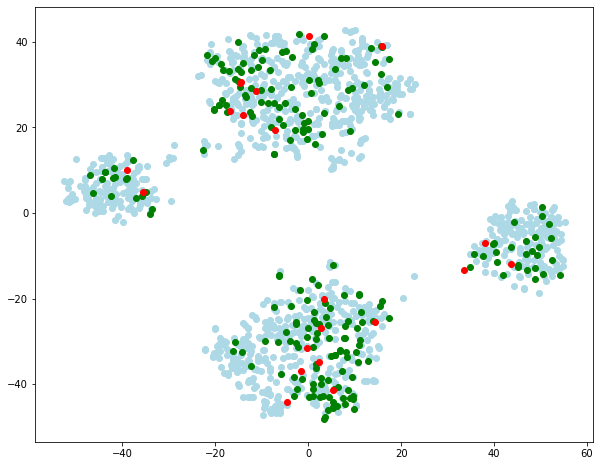

round_2 5759940174020608


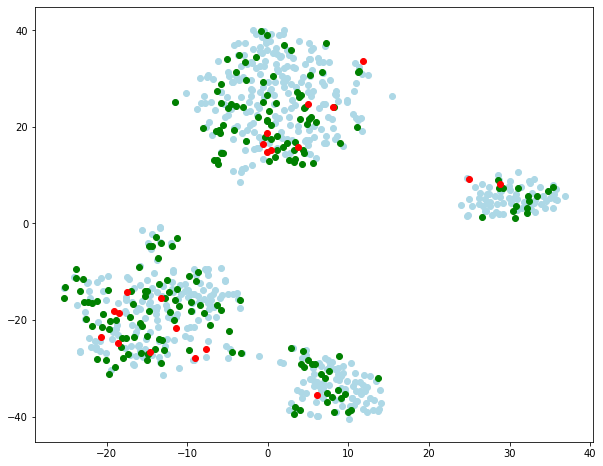

round_2 5708208098246656


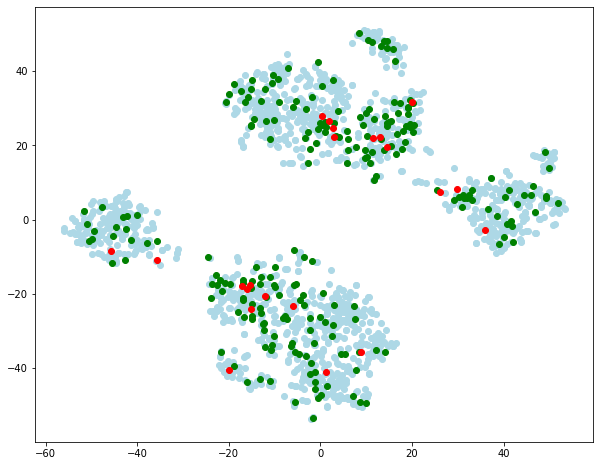

round_2 5677015495606272


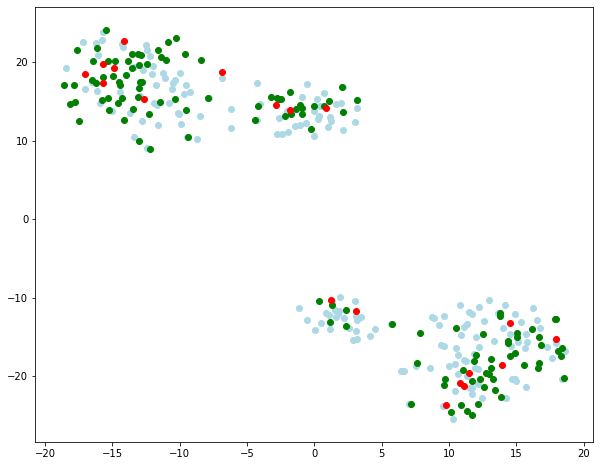

round_3 5709131113562112


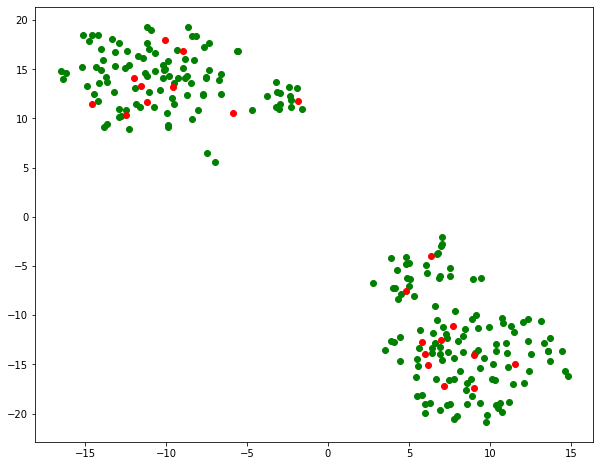

round_3 5765010517131264


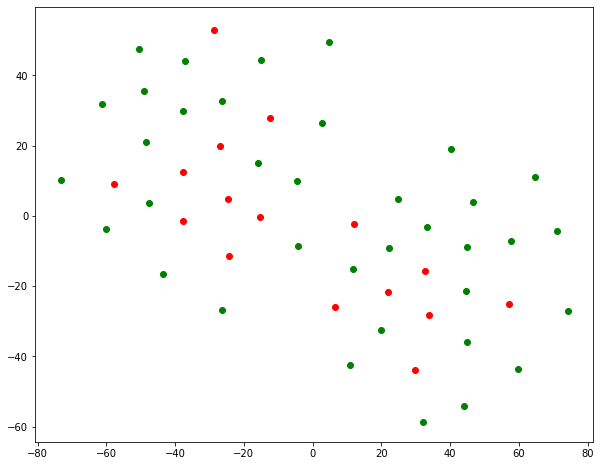

round_3 5643297854849024


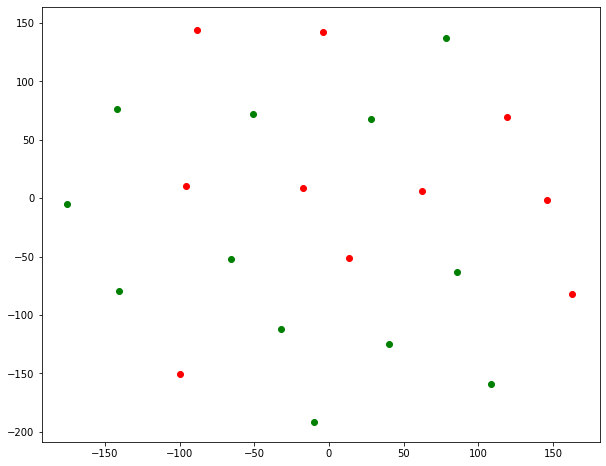

round_3 6346912416399360


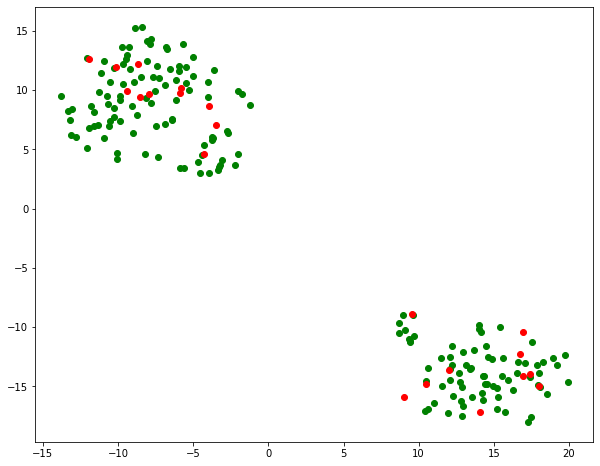

round_3 5743952695132160


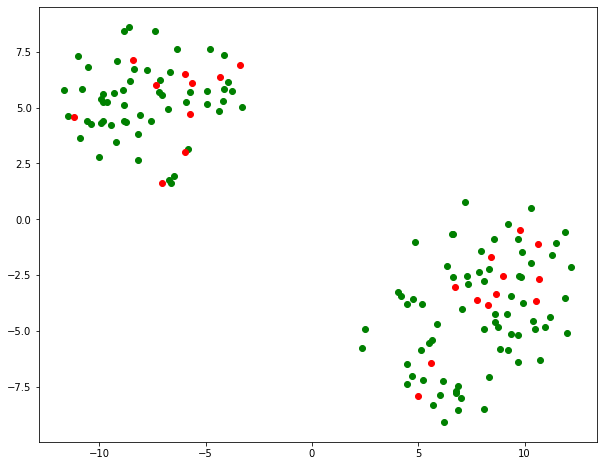

In [10]:
for r in rounds:
    df_round = df[df['round_name']==r]
    problem_num = df_round['problem_num_hash'].unique()
    
    for p in problem_num:
        d = df_round[df_round['problem_num_hash']==p]
        d = d.drop(cols_to_drop, axis=1)
        d[cols_to_norm] = MinMaxScaler().fit_transform(d[cols_to_norm])
        
        x = d.drop('username', axis=1)
        y = d['username']
        
        df_tsne = TSNE(random_state=RS).fit_transform(x)
        x_tsne = df_tsne[:,0]
        y_tsne = df_tsne[:,1]
        plt.figure(figsize=(10,8))
        
        finalist_x = []
        finalist_y = []
        semi_fin_x = []
        semi_fin_y = []
        
        for _x,_y,name in zip(x_tsne, y_tsne, y):
            if name in finalists:
                finalist_x.append(_x)
                finalist_y.append(_y)
            elif name in semi_finalists:
                semi_fin_x.append(_x)
                semi_fin_y.append(_y)
            else:
                plt.scatter(x=_x, y=_y, alpha=1, c='lightblue')
        
        plt.scatter(x=semi_fin_x, y=semi_fin_y, alpha=1, c='green')
        plt.scatter(x=finalist_x, y=finalist_y, alpha=1, c='red')
        
        print(str(r)+' '+str(p))
        plt.show()
        

### PCA

qualification_round 5686275109552128


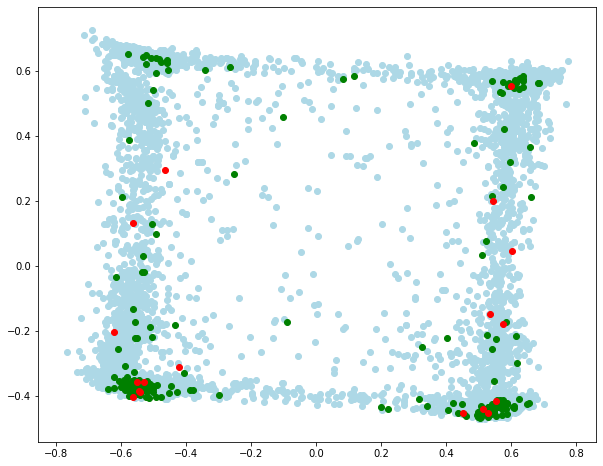

qualification_round 5639104758808576


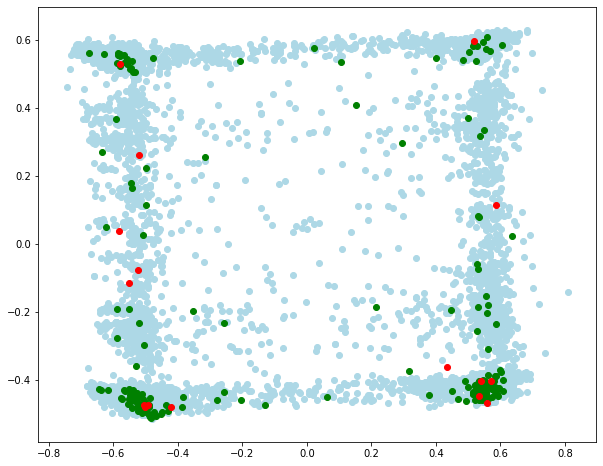

qualification_round 5670465267826688


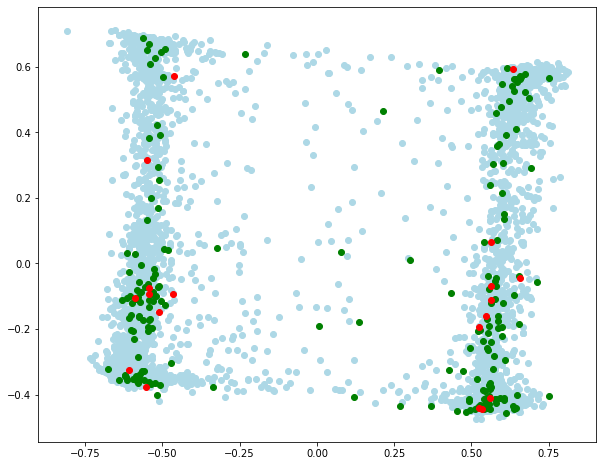

qualification_round 5658571765186560


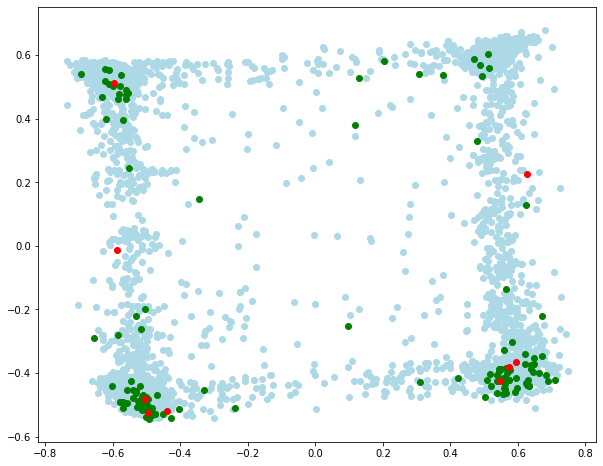

round_2 5750872826970112


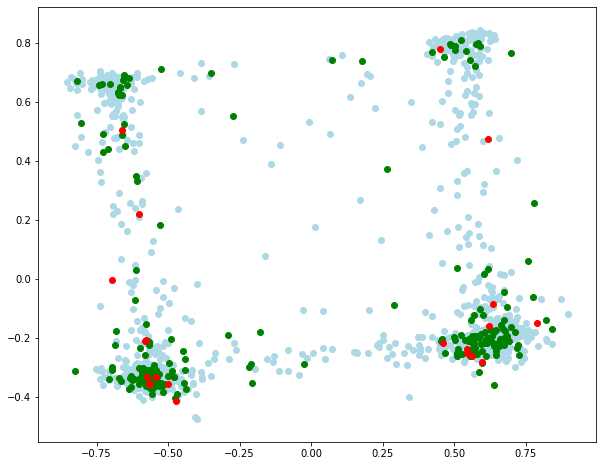

round_2 5759940174020608


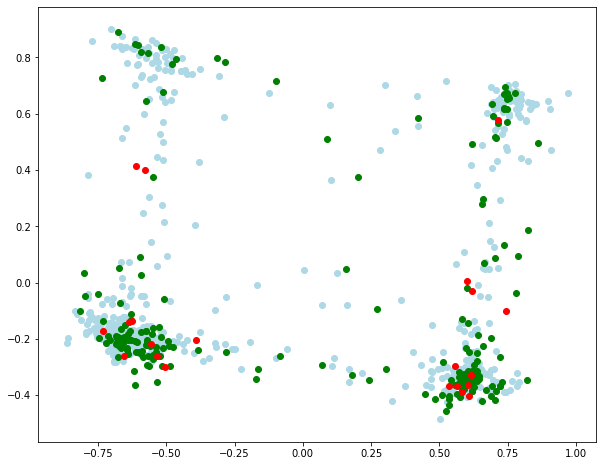

round_2 5708208098246656


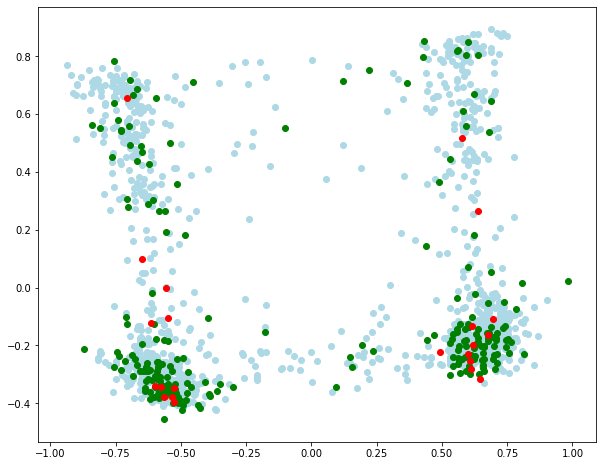

round_2 5677015495606272


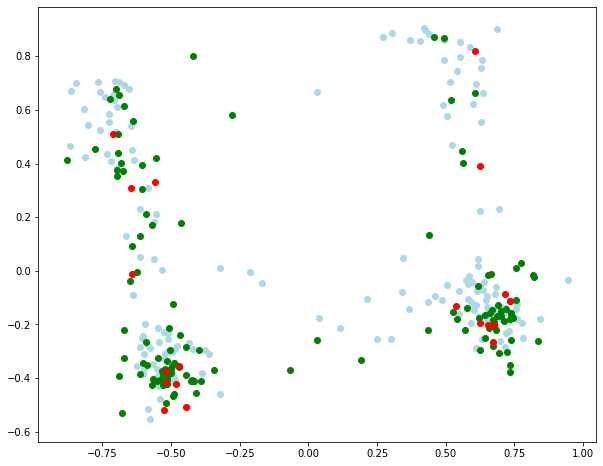

round_3 5709131113562112


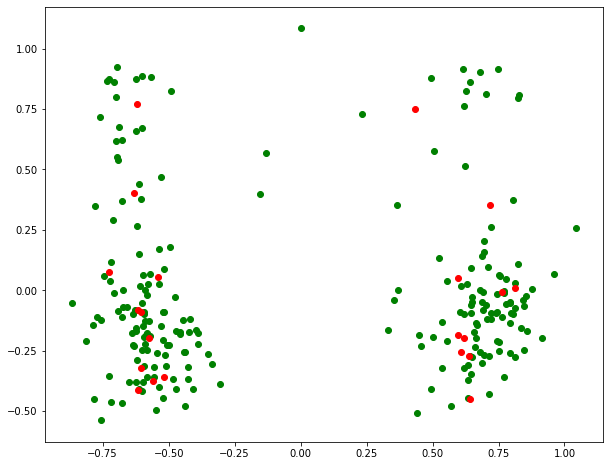

round_3 5765010517131264


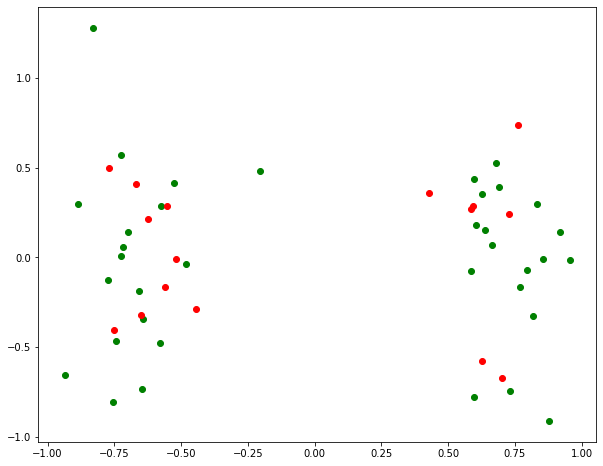

round_3 5643297854849024


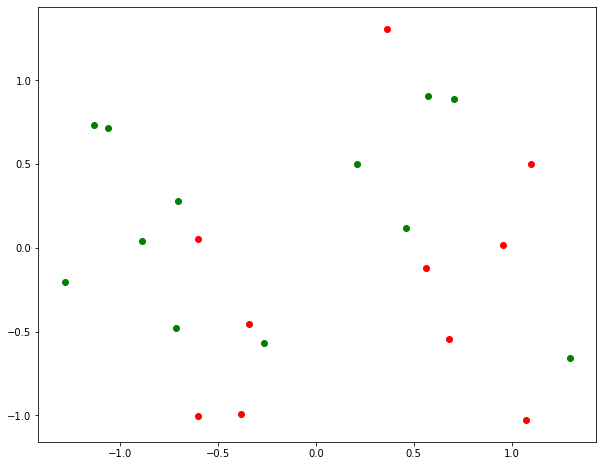

round_3 6346912416399360


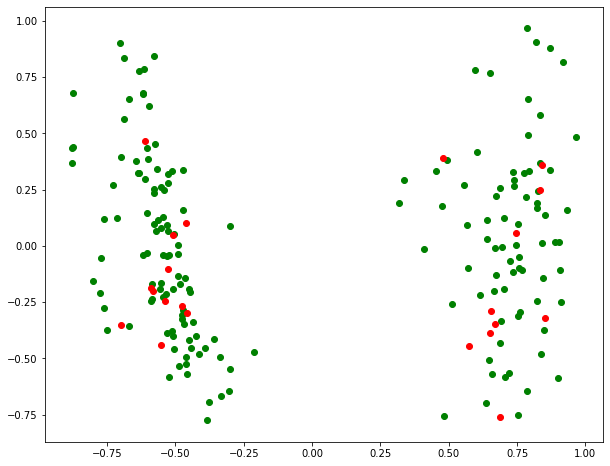

round_3 5743952695132160


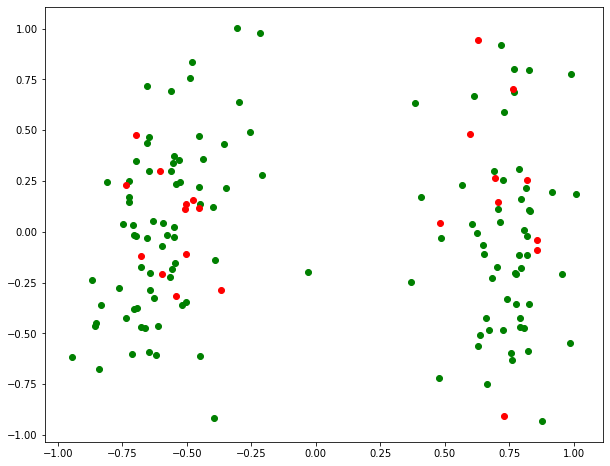

In [13]:
for r in rounds:
    df_round = df[df['round_name']==r]
    problem_num = df_round['problem_num_hash'].unique()
    
    for p in problem_num:
        d = df_round[df_round['problem_num_hash']==p]
        d = d.drop(cols_to_drop, axis=1)
        d[cols_to_norm] = MinMaxScaler().fit_transform(d[cols_to_norm])
        
        x = d.drop('username', axis=1)
        y = d['username']
        
        pca = PCA(n_components=2)
        pca.fit(x)
        pca_2d = pca.transform(x)

        df_2d = pd.DataFrame(pca_2d)
        df_2d.index = x.index
        df_2d.columns = ['PC1','PC2']
        
        x_pca = df_2d['PC1']
        y_pca= df_2d['PC2']
        
        plt.figure(figsize=(10,8))
        
        finalist_x = []
        finalist_y = []
        semi_fin_x = []
        semi_fin_y = []
        
        for _x,_y,name in zip(x_pca, y_pca, y):
            if name in finalists:
                finalist_x.append(_x)
                finalist_y.append(_y)
            elif name in semi_finalists:
                semi_fin_x.append(_x)
                semi_fin_y.append(_y)
            else:
                plt.scatter(x=_x, y=_y, alpha=1, c='lightblue')
        
        plt.scatter(x=semi_fin_x, y=semi_fin_y, alpha=1, c='green')
        plt.scatter(x=finalist_x, y=finalist_y, alpha=1, c='red')
        
        print(str(r)+' '+str(p))
        plt.show()
        

## K-means Elbow method

qualification_round 5686275109552128


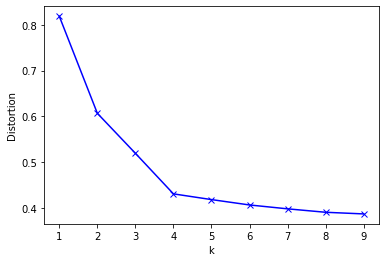

qualification_round 5639104758808576


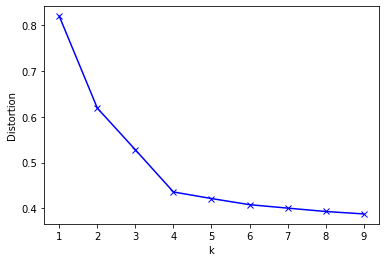

qualification_round 5670465267826688


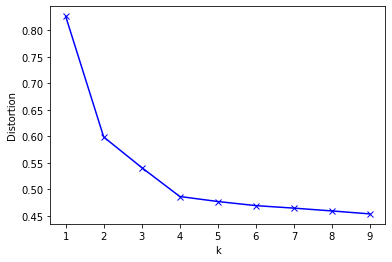

qualification_round 5658571765186560


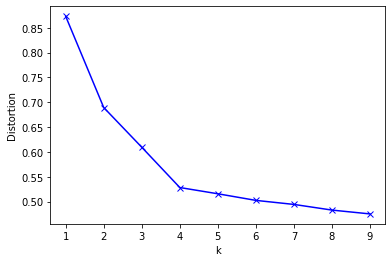

round_2 5750872826970112


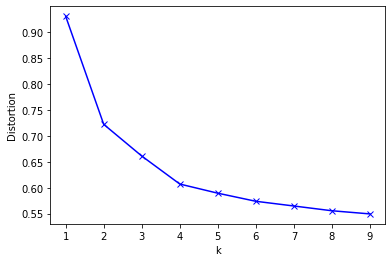

round_2 5759940174020608


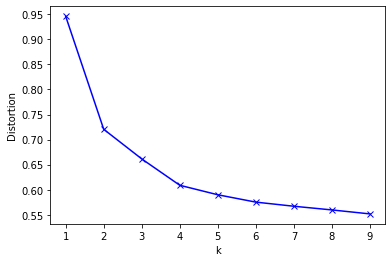

round_2 5708208098246656


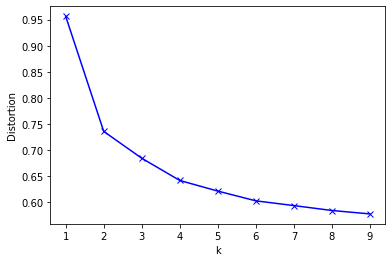

round_2 5677015495606272


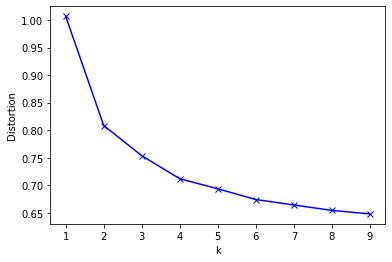

round_3 5709131113562112


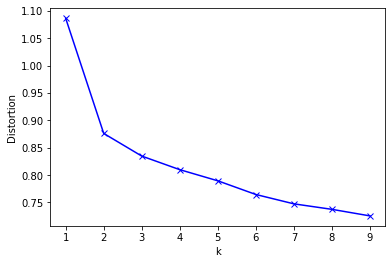

round_3 5765010517131264


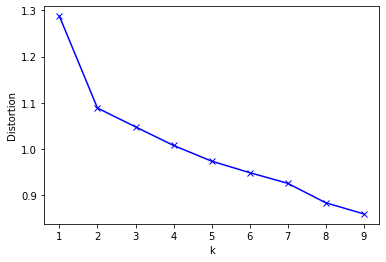

round_3 5643297854849024


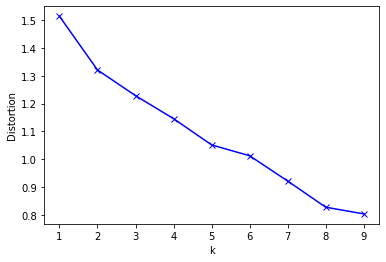

round_3 6346912416399360


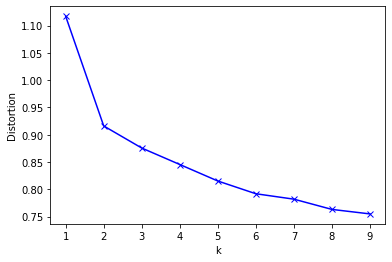

round_3 5743952695132160


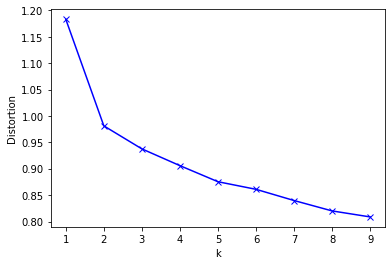

In [5]:
for r in rounds:
    df_round = df[df['round_name']==r]
    problem_num = df_round['problem_num_hash'].unique()
    
    for p in problem_num:
        d = df_round[df_round['problem_num_hash']==p]
        d = d.drop(cols_to_drop, axis=1)
        d[cols_to_norm] = MinMaxScaler().fit_transform(d[cols_to_norm])
        
        x = d.drop('username', axis=1)
        y = d['username']

        distortions = []
        K = range(1,10)
        for k in K:
            kmeanModel = KMeans(n_clusters=k).fit(x)
            kmeanModel.fit(x)
            distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])

        print(r, p)
        # Plot the elbow
        plt.plot(K, distortions, 'bx-')
        plt.xlabel('k')
        plt.ylabel('Distortion')
        plt.show()

## HAC

qualification_round 5686275109552128


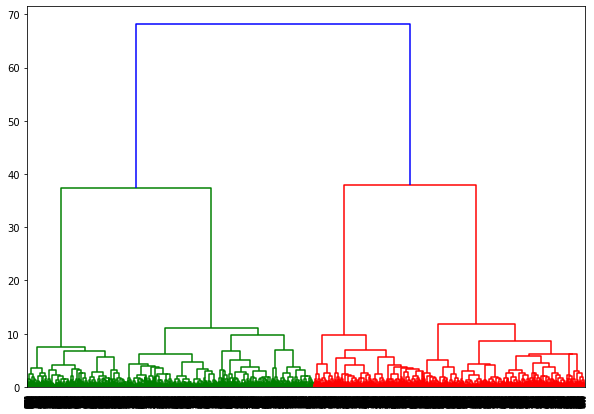

qualification_round 5639104758808576


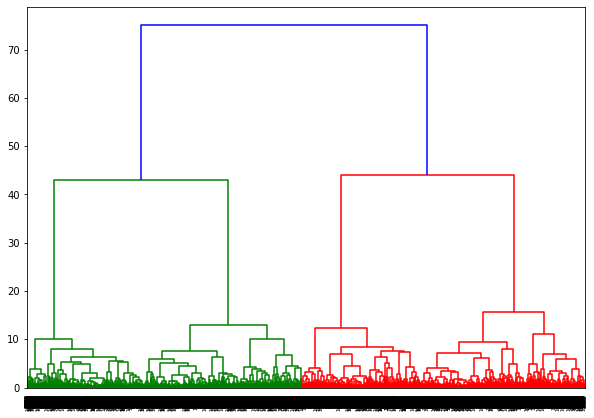

qualification_round 5670465267826688


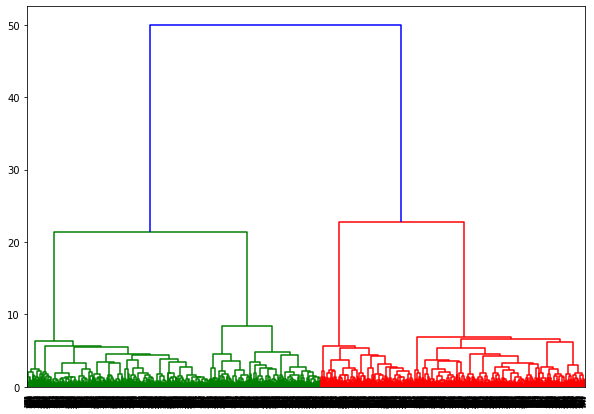

qualification_round 5658571765186560


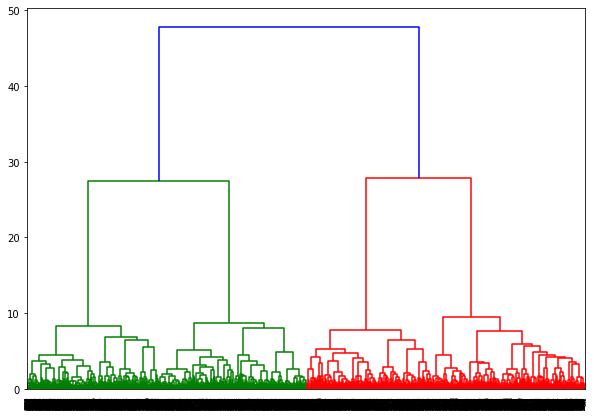

round_2 5750872826970112


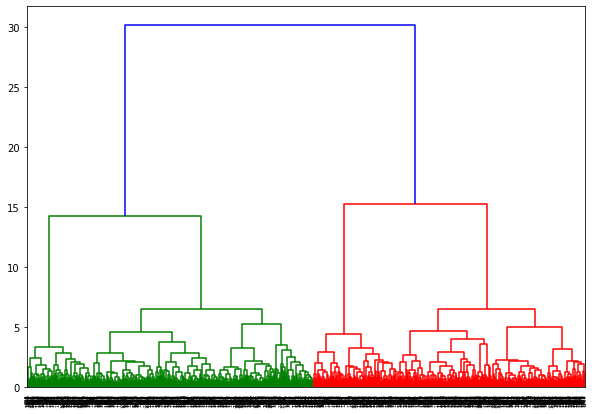

round_2 5759940174020608


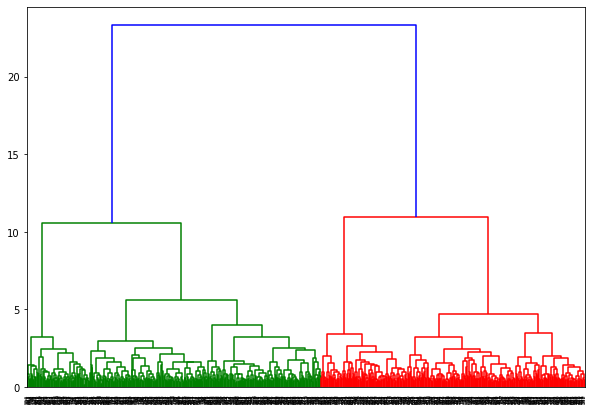

round_2 5708208098246656


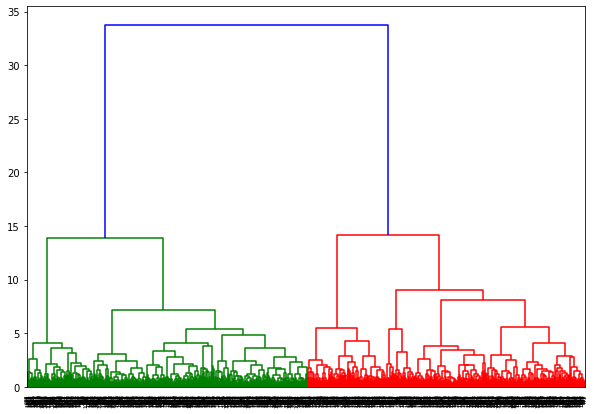

round_2 5677015495606272


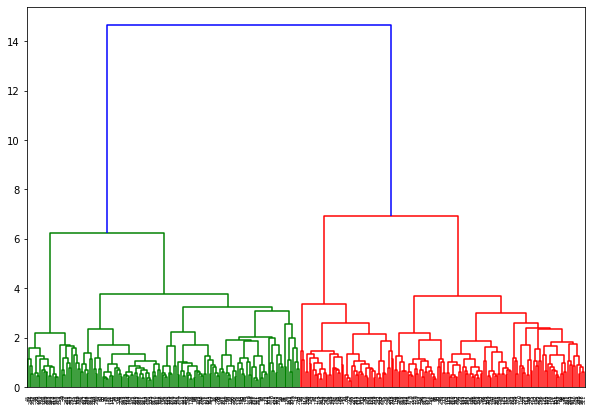

round_3 5709131113562112


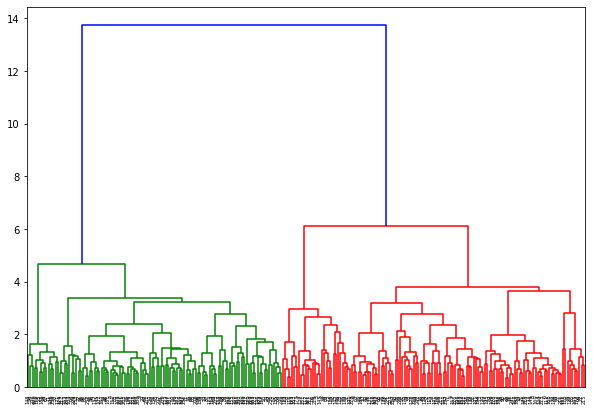

round_3 5765010517131264


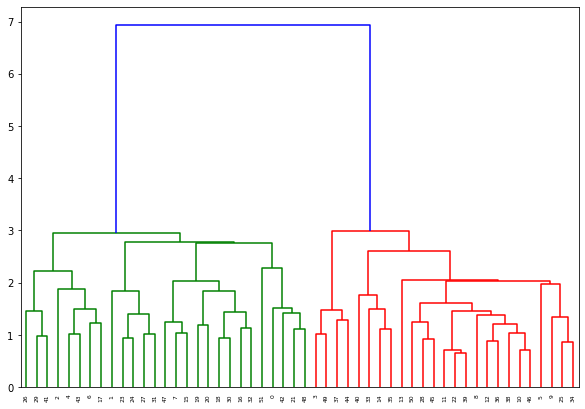

round_3 5643297854849024


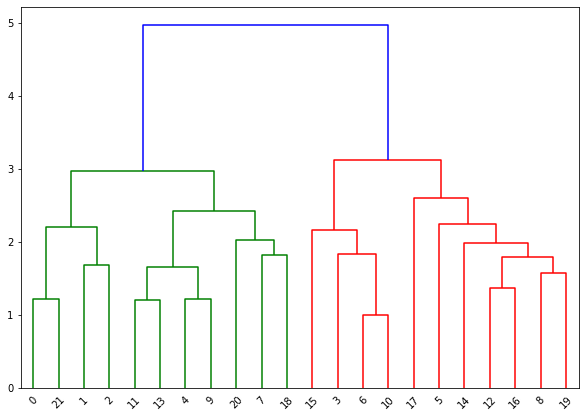

round_3 6346912416399360


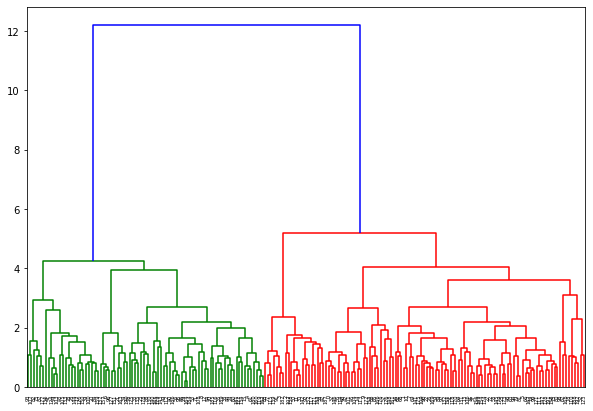

round_3 5743952695132160


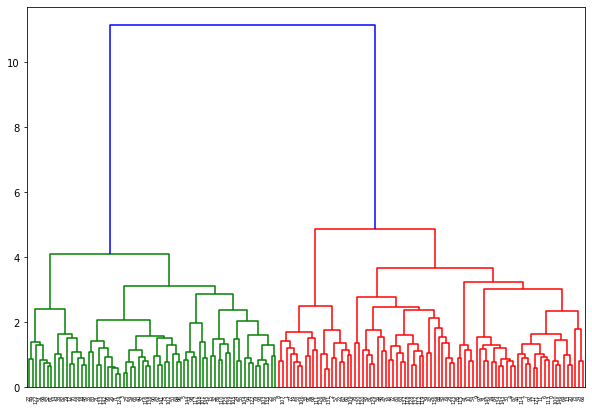

In [14]:
for r in rounds:
    df_round = df[df['round_name']==r]
    problem_num = df_round['problem_num_hash'].unique()
    
    for p in problem_num:
        d = df_round[df_round['problem_num_hash']==p]
        d = d.drop(cols_to_drop, axis=1)
        d[cols_to_norm] = MinMaxScaler().fit_transform(d[cols_to_norm])
        
        x = d.drop('username', axis=1)
        y = d['username']

        linked = linkage(x, 'ward')

        plt.figure(figsize=(10, 7))
        dendrogram(linked,
                    orientation='top',
                    distance_sort='descending',
                    show_leaf_counts=True)
        print(str(r)+' '+str(p))
        plt.show()

### Gap statistic

In [45]:
from gap_statistic import OptimalK
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

optimalK = OptimalK(parallel_backend='rust')
# optimalK

for r in rounds:
    df_round = df[df['round_name']==r]
    problem_num = df_round['problem_num_hash'].unique()
    
    for p in problem_num:
        d = df_round[df_round['problem_num_hash']==p]
        d = d.drop(cols_to_drop, axis=1)
        d[cols_to_norm] = MinMaxScaler().fit_transform(d[cols_to_norm])
        
        x = d.drop('username', axis=1)
        y = d['username']

        n_clusters = optimalK(x.values, cluster_array=np.arange(1, 10))
        print('Optimal clusters: ', n_clusters)

Optimal clusters:  8
Optimal clusters:  3
Optimal clusters:  9
Optimal clusters:  1
Optimal clusters:  6
Optimal clusters:  9
Optimal clusters:  3
Optimal clusters:  7
Optimal clusters:  7
Optimal clusters:  8
Optimal clusters:  8
Optimal clusters:  9
Optimal clusters:  2


## Feature Importance of Cluster

### RF

In [6]:
from collections import Counter

feature_dic = {}
counter = 0
for r in ['qualification_round', 'round_2']:
    df_round = df[df['round_name']==r]
    problem_num = df_round['problem_num_hash'].unique()
    
    for p in problem_num:
        counter += 1
        
        d = df_round[df_round['problem_num_hash']==p]
        d = d.drop(cols_to_drop, axis=1)
        d[cols_to_norm] = MinMaxScaler().fit_transform(d[cols_to_norm])
        
        x = d.drop('username', axis=1)
        y = d['username']
        
        km = KMeans(n_clusters=4, init='random', n_init=10, random_state=RS)
        km.fit(x)
        
        wwq = pd.DataFrame(np.asarray(km.cluster_centers_), columns = x.columns)
#         wwq.applymap(lambda x:f"{x:.2f}").to_csv("csv/{}.csv".format(counter))
        
        # features variance
#         x['label'] = km.labels_
#         x_mean = x.groupby('label').mean()
#         results = pd.DataFrame(columns=['Variable', 'Var'])
#         for column in x_mean.columns:
#             results.loc[len(results), :] = [column, np.var(x_mean[column])]
            
#         selected_columns = results.sort_values(
#             'Var', ascending=False,
#         ).head(10)
#         print(r, p)
#         print(selected_columns)
#         print()

        ## RF feature importance
        rf = RandomForestClassifier(n_estimators=100) 
        rf.fit(x, km.labels_) 
        feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = x.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
        for index, row in feature_importances.iterrows():
            if index in feature_dic.keys():
                feature_dic[index] += row[0]
            else:
                feature_dic[index] = row[0]
        
f_rank = pd.DataFrame(feature_dic.items(), columns=['Features', 'Importance'])
f_rank['Importance'] = f_rank['Importance']/counter
f_rank.sort_values('Importance', ascending=False) #.to_string(index=False)

,Features,Importance
0,nl_before_braces,0.370776
2,tabs_lead_lines,0.161999
1,num_tabs,0.143107
3,num_spaces,0.099383
5,avg_line_length,0.041282
4,white_space_ratio,0.039556
6,num_of_tokens,0.019225
8,stdev_line_length,0.012533
7,num_empty_lines,0.011086
9,num_of_uniq_tokens,0.010971


# Top Programmer Prediction

In [16]:
models = []
models.append(('Dummy',DummyClassifier(strategy='stratified')))
models.append(("LogisticRegression",LogisticRegression()))
models.append(("SVC",SVC()))
models.append(("LinearSVC",LinearSVC()))
models.append(("KNeighbors",KNeighborsClassifier()))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("RandomForest",RandomForestClassifier()))

us_models = []
us_models.append(('RUSAda', RUSBoostClassifier()))
us_models.append(("BalancedRandomForest",BalancedRandomForestClassifier()))

scorers = ['precision','recall', 'f1_macro','roc_auc','balanced_accuracy']

## Unbalanced

In [17]:
from sklearn.metrics import make_scorer, precision_score

kfold = StratifiedKFold(n_splits=10, random_state=RS)

answer = []

for r in ['qualification_round', 'round_2']:
    df_round = df[df['round_name']==r]
    problem_num = df_round['problem_num_hash'].unique()
    
    for p in problem_num:
        d = df_round[df_round['problem_num_hash']==p]
        y = d['semi_finalist']
        d = d.drop(cols_to_drop, axis=1)
        d[cols_to_norm] = MinMaxScaler().fit_transform(d[cols_to_norm])
        x = d.drop('username', axis=1)
        
        for name,model in models:
            asd = np.bincount(y)
            values = [r, p, f"{asd}", name]
            result = cross_validate(model, x, y, cv=kfold,scoring=scorers)
            for sc in scorers:
                sc = f"test_{sc}"
                # print(f"{name} {sc} {result[sc].mean():.3f}")
                values.append(round(result[sc].mean(), 3))
 
            answer.append(values)

c = ['round', 'problem', 'shape', 'model']
c.extend(scorers)
answer = pd.DataFrame(answer, columns=c)
answer.groupby('model').mean().sort_values(['recall', 'f1_macro'], ascending=[False, False])

,problem,precision,recall,f1_macro,roc_auc,balanced_accuracy
model,,,,,,
DecisionTree,5693806687027200,0.212125,0.235250,0.538875,0.542875,0.542875
Dummy,5693806687027200,0.154125,0.155875,0.500625,0.503250,0.501625
KNeighbors,5693806687027200,0.239500,0.147125,0.525875,0.599875,0.530000
RandomForest,5693806687027200,0.269875,0.096000,0.512875,0.696000,0.527500
LinearSVC,5693806687027200,0.213125,0.085500,0.504125,0.723000,0.520500
LogisticRegression,5693806687027200,0.204250,0.081250,0.502125,0.722500,0.521250
SVC,5693806687027200,0.068875,0.060375,0.483500,0.655000,0.510500


## Synthetic Balance

In [18]:
answer = []
kfold = StratifiedKFold(n_splits=10, random_state=RS)

for r in ['qualification_round', 'round_2']:
    df_round = df[df['round_name']==r]
    problem_num = df_round['problem_num_hash'].unique()
    
    for p in problem_num:
        d = df_round[df_round['problem_num_hash']==p]
        y = d['semi_finalist']
        d = d.drop(cols_to_drop, axis=1)
        d[cols_to_norm] = MinMaxScaler().fit_transform(d[cols_to_norm])
        x = d.drop('username', axis=1)

        sm = SMOTE(random_state=RS)
        
        for name,model in models:
            shp = np.bincount(y)
            values = [r, p, f"{shp}", name]
            
            sm_model = Pipeline([('smote', sm), (name, model)])
            
            result = cross_validate(sm_model, x, y, cv=kfold,scoring=scorers)

            for sc in scorers:
                sc = f"test_{sc}"
                # print(f"{name} {sc} {result[sc].mean():.3f}")
                values.append(round(result[sc].mean(), 3))
 
            answer.append(values)

c = ['round', 'problem', 'shape', 'model']
c.extend(scorers)
answer = pd.DataFrame(answer, columns=c)
answer.groupby('model').mean().sort_values(['recall', 'f1_macro'], ascending=[False, False])

,problem,precision,recall,f1_macro,roc_auc,balanced_accuracy
model,,,,,,
LinearSVC,5693806687027200,0.230500,0.667500,0.539375,0.724375,0.674375
LogisticRegression,5693806687027200,0.232750,0.659000,0.540250,0.726250,0.672625
SVC,5693806687027200,0.232125,0.630375,0.545625,0.715250,0.664875
KNeighbors,5693806687027200,0.202625,0.530750,0.517500,0.631375,0.599625
Dummy,5693806687027200,0.148125,0.496000,0.407250,0.489000,0.496125
DecisionTree,5693806687027200,0.211000,0.314000,0.541750,0.562625,0.562625
RandomForest,5693806687027200,0.334625,0.245000,0.585750,0.706750,0.578875


## Undersampled models

In [19]:
kfold = StratifiedKFold(n_splits=10, random_state=RS)

answer = []

for r in ['qualification_round', 'round_2']:
    df_round = df[df['round_name']==r]
    problem_num = df_round['problem_num_hash'].unique()
    
    for p in problem_num:
        d = df_round[df_round['problem_num_hash']==p]
        y = d['semi_finalist']
        d = d.drop(cols_to_drop, axis=1)
        d[cols_to_norm] = MinMaxScaler().fit_transform(d[cols_to_norm])
        x = d.drop('username', axis=1)
        
        for name,model in us_models:
            asd = np.bincount(y)
            values = [r, p, f"{asd}", name]
            result = cross_validate(model, x, y, cv=kfold,scoring=scorers)
            for sc in scorers:
                sc = f"test_{sc}"
                # print(f"{name} {sc} {result[sc].mean():.3f}")
                values.append(round(result[sc].mean(), 3))
 
            answer.append(values)

c = ['round', 'problem', 'shape', 'model']
c.extend(scorers)
answer = pd.DataFrame(answer, columns=c)
answer.groupby('model').mean().sort_values(['recall', 'f1_macro'], ascending=[False, False])

,problem,precision,recall,f1_macro,roc_auc,balanced_accuracy
model,,,,,,
BalancedRandomForest,5693806687027200,0.22475,0.661875,0.530500,0.72825,0.665750
RUSAda,5693806687027200,0.19600,0.504625,0.510125,0.64575,0.601125


## Feature importance (Top Programmers)

### BRF

In [20]:
kfold = StratifiedKFold(n_splits=10, random_state=RS)

feature_dic = {}
counter = 0
for r in ['qualification_round', 'round_2']:
    df_round = df[df['round_name']==r]
    problem_num = df_round['problem_num_hash'].unique()
    
    for p in problem_num:
        counter+=1
        d = df_round[df_round['problem_num_hash']==p]
        y = d['semi_finalist']
        d = d.drop(cols_to_drop, axis=1)
        d[cols_to_norm] = MinMaxScaler().fit_transform(d[cols_to_norm])
        x = d.drop('username', axis=1)
        
        rf = BalancedRandomForestClassifier(n_estimators=100) 
        rf.fit(x, y) 
        feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = x.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
        
        for index, row in feature_importances.iterrows():
            if index in feature_dic.keys():
                feature_dic[index] += row[0]
            else:
                feature_dic[index] = row[0]
        
f_rank = pd.DataFrame(feature_dic.items(), columns=['Features', 'Importance'])
f_rank['Importance'] = f_rank['Importance']/counter
f_rank.sort_values('Importance', ascending=False)

,Features,Importance
6,num_of_tokens,0.065039
1,num_of_uniq_tokens,0.063819
5,functions,0.061089
2,macros,0.060120
0,occur_if,0.055111
9,literals,0.053730
3,occur_for,0.050287
8,stdev_line_length,0.047265
7,white_space_ratio,0.045754
4,num_tabs,0.045417


### RFE

In [21]:
sm = SMOTE(random_state=RS)
sm_model = Pipeline([('smote', sm), ('linSVC', LinearSVC)])

feature_dic = {}
counter = 0
for r in ['qualification_round', 'round_2']:
    df_round = df[df['round_name']==r]
    problem_num = df_round['problem_num_hash'].unique()
    
    for p in problem_num:
        counter+=1
        d = df_round[df_round['problem_num_hash']==p]
        y = d['semi_finalist']
        d = d.drop(cols_to_drop, axis=1)
        d[cols_to_norm] = MinMaxScaler().fit_transform(d[cols_to_norm])
        x = d.drop('username', axis=1)

        x, y = sm.fit_resample(x,y)
        
        rfe = RFE(LinearSVC(), 1)
        rfe = rfe.fit(x, y)
        
        rank =  sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), x.columns))
        for r, f in rank:
            if f in feature_dic.keys():
                feature_dic[f] += r
            else:
                feature_dic[f] = r
                
        
        rank =  sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), x.columns))
        for r, f in rank:
            if f in feature_dic.keys():
                feature_dic[f] += r
            else:
                feature_dic[f] = r
                
f_rank = pd.DataFrame(feature_dic.items(), columns=['Features', 'Rank'])
f_rank['Rank'] = f_rank['Rank']/counter
f_rank.sort_values('Rank', ascending=True)

,Features,Rank
0,comments,11.75
21,num_of_tokens,17.50
14,literals,19.75
3,functions,23.25
1,line_comments,23.50
19,occur_elseif,23.50
2,occur_if,24.50
9,macros,24.75
12,occur_continue,25.25
15,num_of_uniq_tokens,25.75


## Relations


 qualification_round 5686275109552128


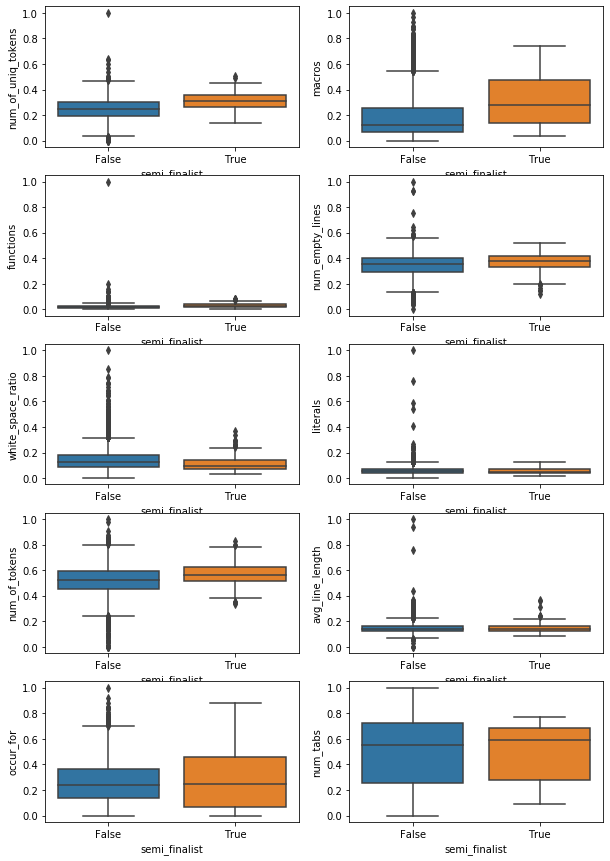


 qualification_round 5639104758808576


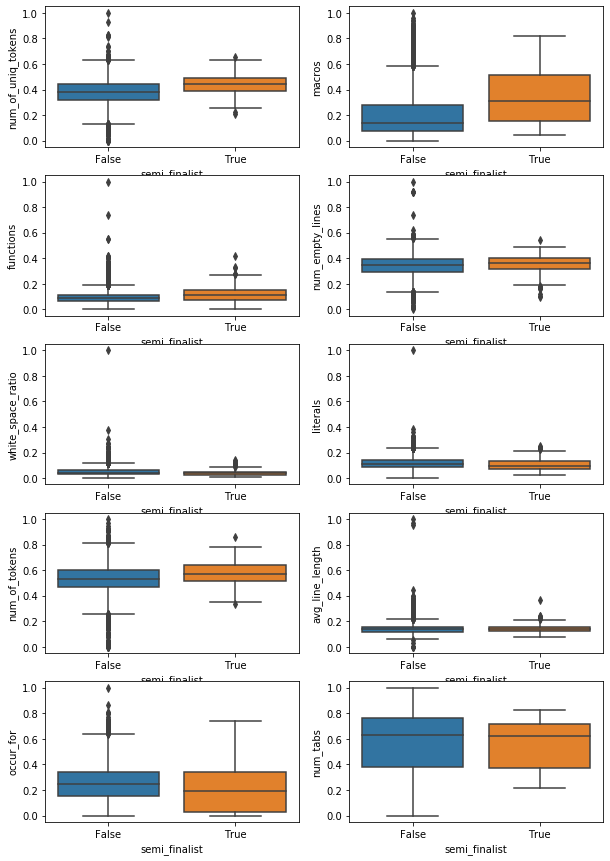


 qualification_round 5670465267826688


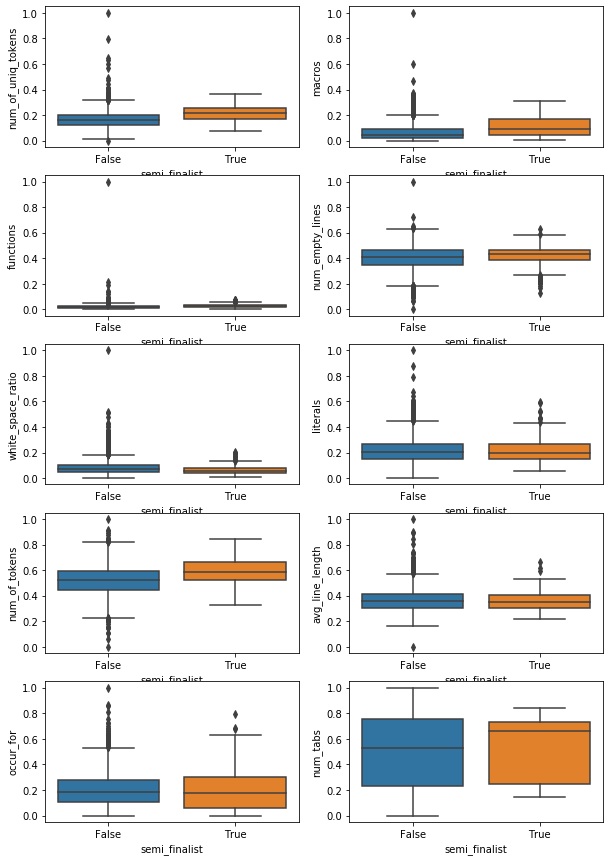


 qualification_round 5658571765186560


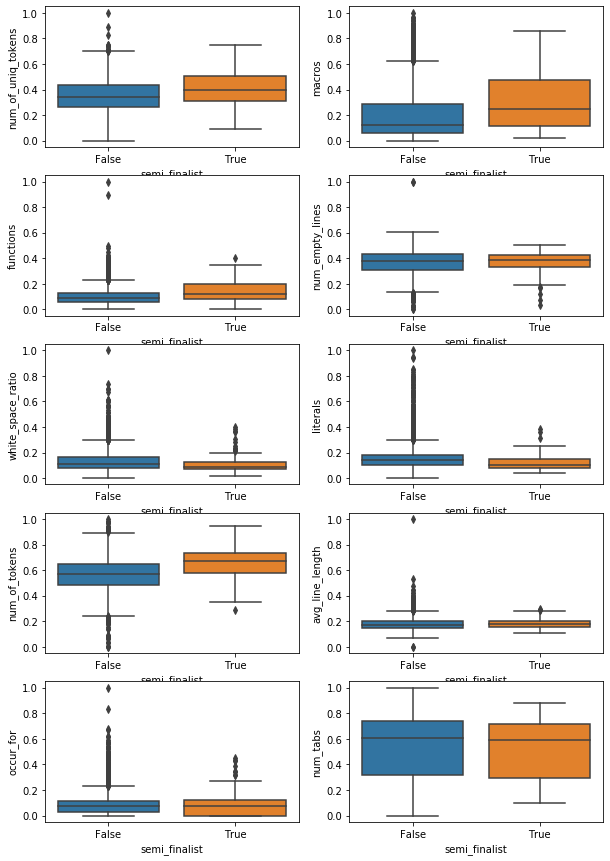


 round_2 5750872826970112


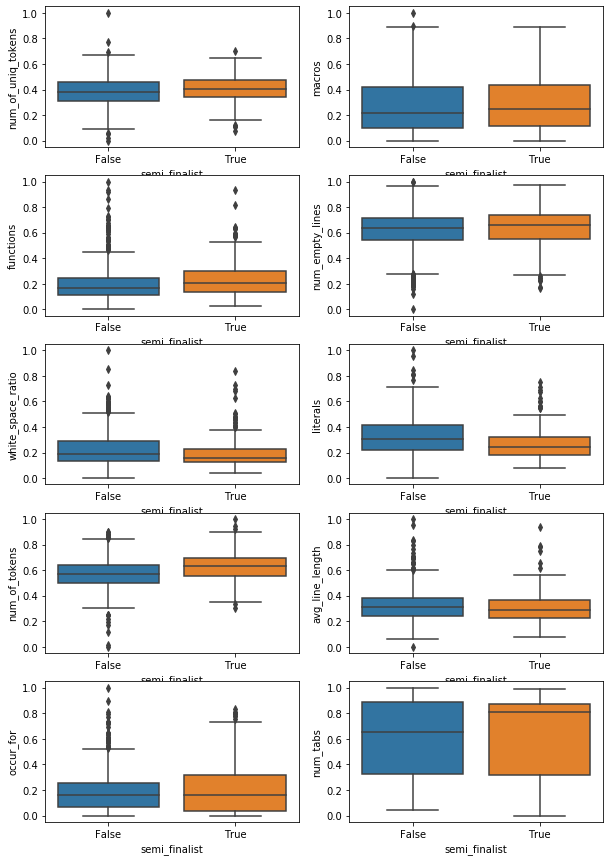


 round_2 5759940174020608


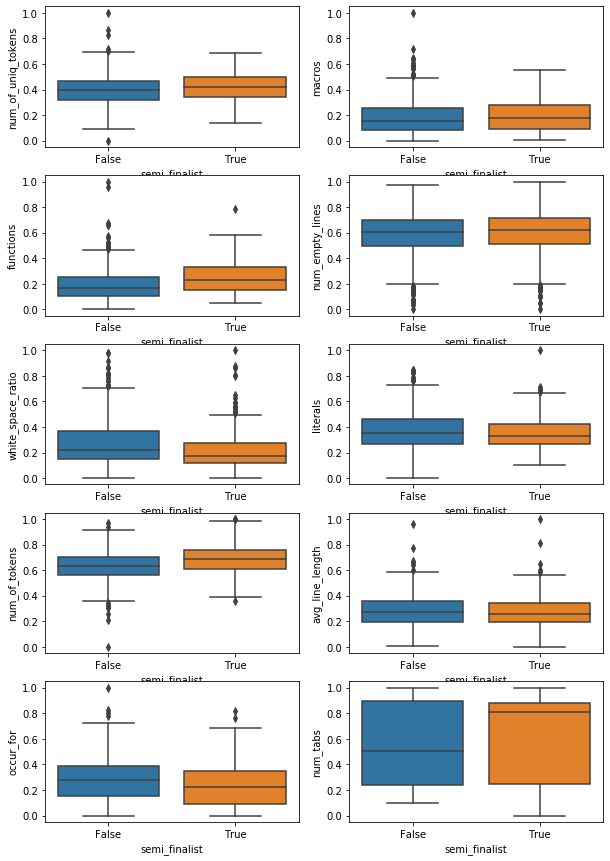


 round_2 5708208098246656


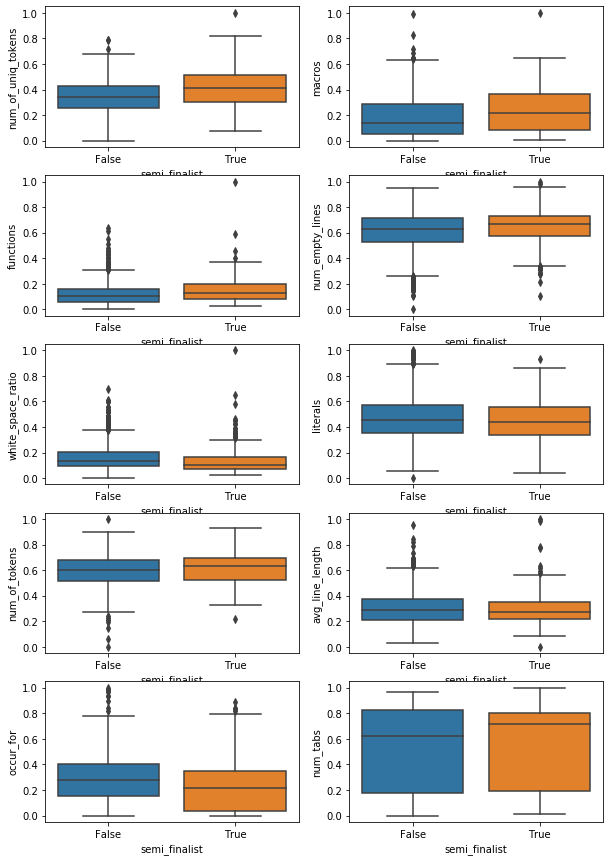


 round_2 5677015495606272


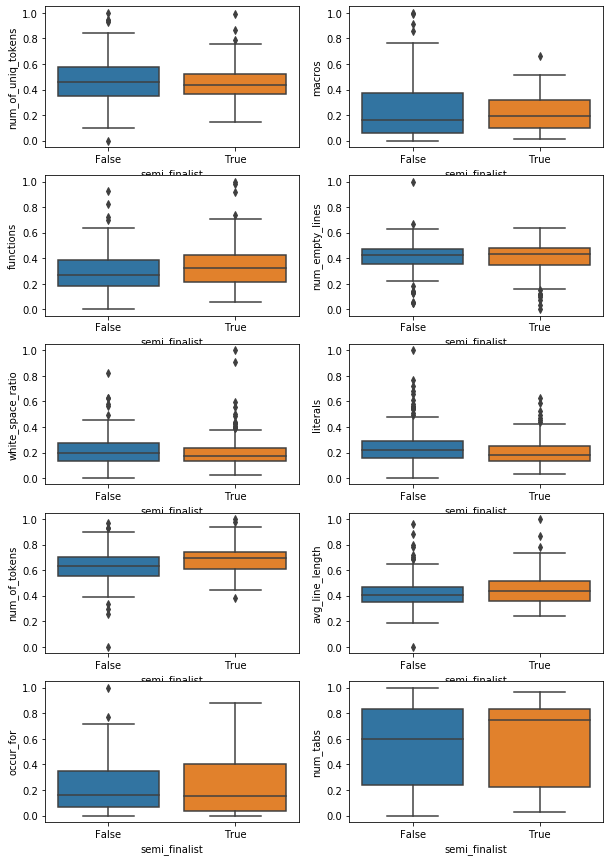

In [22]:
imp_feats = ['num_of_uniq_tokens', 'macros', 'functions', 'num_empty_lines', 'white_space_ratio',
             'literals', 'num_of_tokens', 'avg_line_length', 'occur_for', 'num_tabs']

for r in ['qualification_round', 'round_2']:
    df_round = df[df['round_name']==r]
    problem_num = df_round['problem_num_hash'].unique()
    
    for p in problem_num:
        print("\n", r, p)
        d = df_round[df_round['problem_num_hash']==p]
        d[cols_to_norm] = MinMaxScaler().fit_transform(d[cols_to_norm])
        
        y = d['semi_finalist']
        
        fig, ax = plt.subplots(5,2,  figsize=(10, 15))
        for var, subplot in zip(imp_feats, ax.flatten()):
            sns.boxplot(x='semi_finalist', y=var, data=d, ax=subplot)
        plt.show()